## 二、数据聚合
* 指任何能够从数组产生标量值的数据转换过程

In [33]:
print df

grouped = df.groupby('key1')
print 
print grouped['data1'].quantile(0.9) # 计算样本分位数

      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
4 -0.263047  0.130625    a  one

key1
a   -0.173409
b    0.655065
Name: data1, dtype: float64


In [89]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

print grouped.agg(peak_to_peak) # 使用自己的聚合函数，只需将其传入aggregate或agg
grouped.describe()

               size   tip   tip_pct  total_bill
sex    smoker                                  
Female No         5  4.20  0.195876       28.58
       Yes        3  5.50  0.360233       41.23
Male   No         4  7.75  0.220186       40.82
       Yes        4  9.00  0.674707       43.56


size        tip    tip_pct  total_bill
sex    smoker                                                   
Female No     count  54.000000  54.000000  54.000000   54.000000
              mean    2.592593   2.773519   0.156921   18.105185
              std     1.073146   1.128425   0.036421    7.286455
              min     1.000000   1.000000   0.056797    7.250000
              25%     2.000000   2.000000   0.139708   12.650000
              50%     2.000000   2.680000   0.149691   16.690000
              75%     3.000000   3.437500   0.181630   20.862500
              max     6.000000   5.200000   0.252672   35.830000
       Yes    count  33.000000  33.000000  33.000000   33.000000
              mean    2.242424   2.931515   0.182150   17.977879
              std     0.613917   1.219916   0.071595    9.189751
              min     1.000000   1.000000   0.056433    3.070000
              25%     2.000000   2.000000   0.152439   12.760000
              50%     2.000000   2.880000   0.173913   16.270000
              75%     2.000000   3.500000   0.198216   22.120000
              max     4.000000   6.500000   0.416667   44.300000
Male   No     count  97.000000  97.000000  97.000000   97.000000
              mean    2.711340   3.113402   0.160669   19.791237
              std     0.989094   1.489559   0.041849    8.726566
              min     2.000000   1.250000   0.071804    7.510000
              25%     2.000000   2.000000   0.131810   13.810000
              50%     2.000000   2.740000   0.157604   18.240000
              75%     3.000000   3.710000   0.186220   22.820000
              max     6.000000   9.000000   0.291990   48.330000
       Yes    count  60.000000  60.000000  60.000000   60.000000
              mean    2.500000   3.051167   0.152771   22.284500
              std     0.892530   1.500120   0.090588    9.911845
              min     1.000000   1.000000   0.035638    7.250000
              25%     2.000000   2.000000   0.101845   15.272500
              50%     2.000000   3.000000   0.141015   20.390000
              75%     3.000000   3.820000   0.191697   28.572500
              max     5.000000  10.000000   0.710345   50.810000

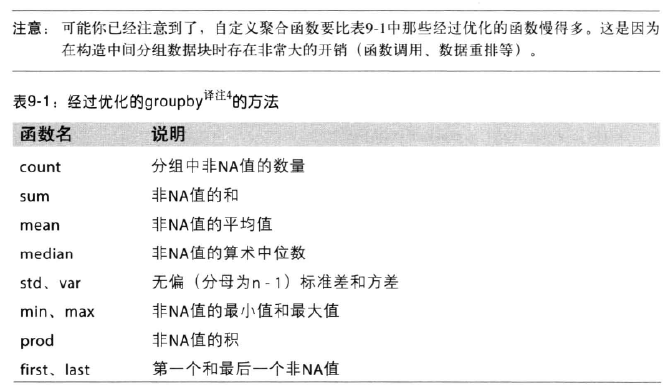

In [31]:
Image(filename="picture\Data Aggregation.png")

In [88]:
tips = pd.read_csv('Data_Files/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# print tips
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### 1 面向列的多函数应用
* 对不同的列使用不同的聚合函数，或一次应用多个函数

In [87]:
grouped = tips.groupby(['sex', 'smoker']) # 分组
print grouped

grouped_pct = grouped['tip_pct']
print grouped_pct
print 
print grouped_pct.agg('mean') # 统计函数方法可以字符串形式传入
print 
print grouped_pct.agg(['mean', 'std', peak_to_peak]) # 传入一组函数或函数名
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])


sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707


foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [86]:
functions = ['count', 'mean', 'max'] # 定义一组应用于全部列的函数，或不同的列应用不同的函数

result = grouped['tip_pct', 'total_bill'].agg(functions)
print result
result['tip_pct']

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81


count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [85]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
print grouped['tip_pct', 'total_bill'].agg(ftuples)
print 
print grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],'size' : 'sum'})

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150


tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### 2 以“无索引”的形式返回聚合数据

In [84]:
print tips.groupby(['sex', 'smoker']).mean()
tips.groupby(['sex', 'smoker'], as_index=False).mean()

               total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771


,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771
